In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
file_path = 'mimic_2425.csv'
df = pd.read_csv(file_path)
df = df.rename(columns={'Unnamed: 0': 'Timestamp'})

# Extract features and target variables
features = df[['RR', 'SPO2', 'MAP', 'HR', 'PP', 'CO']]
target_sbp = df['SBP']
target_dbp = df['DBP']

In [3]:
# Standardize the features using MinMaxScaler to scale between 0 and 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

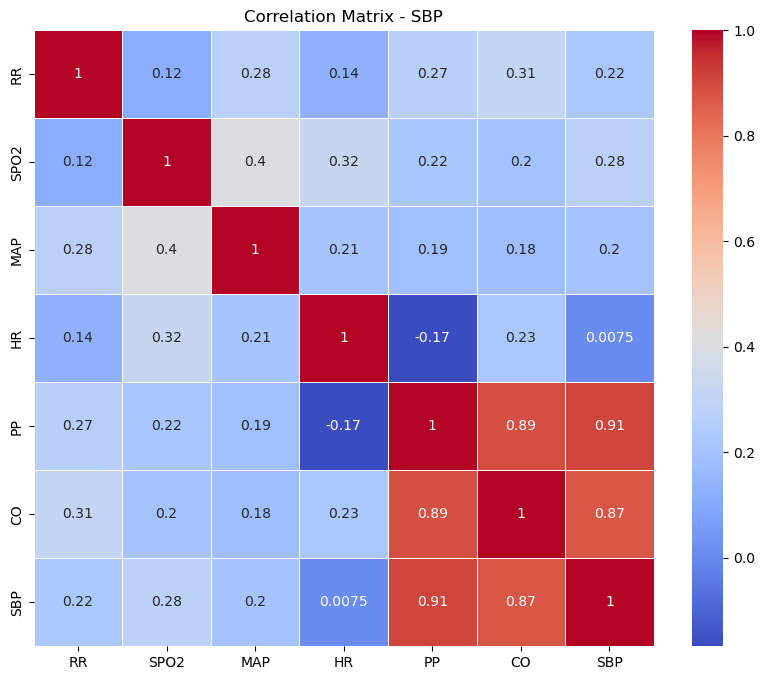

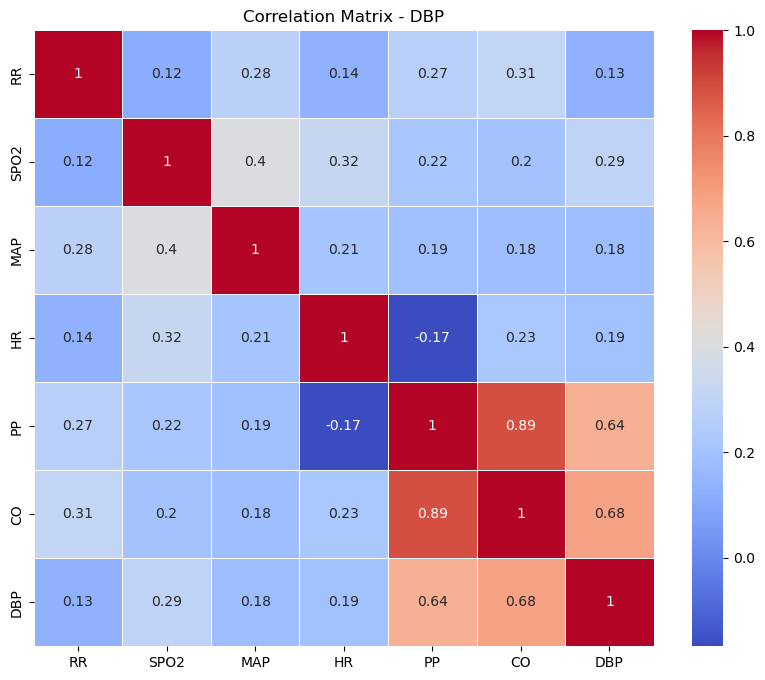

In [4]:
# Concatenate scaled features and target variables for correlation analysis
correlation_data_sbp = pd.concat([pd.DataFrame(features_scaled, columns=features.columns), target_sbp], axis=1)
correlation_data_dbp = pd.concat([pd.DataFrame(features_scaled, columns=features.columns), target_dbp], axis=1)

# Calculate correlations
correlation_matrix_sbp = correlation_data_sbp.corr()
correlation_matrix_dbp = correlation_data_dbp.corr()

# Plot correlation matrices
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix - SBP')
sns.heatmap(correlation_matrix_sbp, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix - DBP')
sns.heatmap(correlation_matrix_dbp, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [5]:
# Select features with correlation above a threshold (e.g., 0.5)
correlation_threshold = 0.5
selected_features_sbp = correlation_matrix_sbp[abs(correlation_matrix_sbp['SBP']) > correlation_threshold].index.tolist()
selected_features_dbp = correlation_matrix_dbp[abs(correlation_matrix_dbp['DBP']) > correlation_threshold].index.tolist()

# Remove 'SBP' and 'DBP' from selected features
selected_features_sbp = [feature for feature in selected_features_sbp if feature not in ['SBP', 'DBP']]
selected_features_dbp = [feature for feature in selected_features_dbp if feature not in ['SBP', 'DBP']]

print("Selected features for SBP:", selected_features_sbp)
print("Selected features for DBP:", selected_features_dbp)

Selected features for SBP: ['PP', 'CO']
Selected features for DBP: ['PP', 'CO']
